In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
quake_plate_dist = pd.read_csv("MR_Data/quake_plate_dist.csv")
quake_vol_dist = pd.read_csv("MR_Data/quake_vol_dist.csv")

In [3]:
quake_plate_dist2 = quake_plate_dist.drop("geometry", axis = 1)
quake_vol_dist2 = quake_vol_dist.drop("geometry", axis = 1)

ML_df = pd.merge(left = quake_plate_dist2, right = quake_vol_dist2, how = "inner")

In [4]:
ML_df = ML_df.drop(["Unnamed: 0", "Secondary_Effects", "PDE_Shaking_Deaths", "PDE_Deaths", "Utsu_Deaths", "EM-DAT_Deaths", 
                    "Other_Deaths", "Max_Deaths", "Country", "closest_plate", "closest_vol"], axis = 1)
ML_df.columns

Index(['lat', 'lng', 'Depth_km', 'Mag', 'Year', 'Month', 'Day', 'SUB', 'CCB',
       'CRB', 'CTF', 'OCB', 'OSR', 'OTF', 'plates', 'Stratovolcano', 'Caldera',
       'Shield', 'Complex Volcano', 'Submarine', 'Volcanic Field',
       'Cinder Cone', 'Dome', 'Fissure vents', 'Somma Volcano', 'Maar',
       'Pyroclastic Cone', 'Tuff Ring', 'Plug', 'None', 'vol'],
      dtype='object')

In [5]:
cols = ['lat', 'lng', 'Depth_km', 'Mag', 'Year', 'Month', 'Day', 'SUB', 'CCB',
       'CRB', 'CTF', 'OCB', 'OSR', 'OTF', 'plates', 'Stratovolcano', 'Caldera',
       'Shield', 'Complex Volcano', 'Submarine', 'Volcanic Field',
       'Cinder Cone', 'Dome', 'Fissure vents', 'Somma Volcano', 'Maar',
       'Pyroclastic Cone', 'Tuff Ring', 'Plug', 'None', 'vol']
ML_df[cols] = ML_df[cols].apply(pd.to_numeric)#, errors='coerce')

In [6]:
array = ML_df.values

R^2: 0.9854245005251895
Root Mean Squared Error: 7.230391138059323
[0.99463045 0.99410876 0.99400935 0.99326998 0.99246183]
Average 5-Fold CV Score: 0.9936960713990809
0.9923413482898189
0.9937421034195767


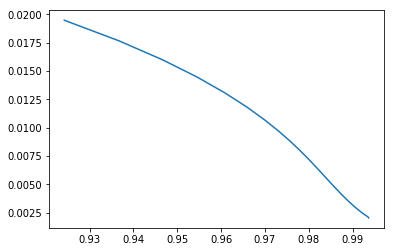

In [7]:
#Train model for lat lng

X = array[:,7:]
y = array[:,:2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

cvscores_3 = cross_val_score(reg, X, y, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X, y, cv = 10)
print(np.mean(cvscores_10))

alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize = True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
plt.plot(ridge_scores, ridge_scores_std)

R^2: -0.03976133395043643
Root Mean Squared Error: 17.24130422609358
[-14.39320953  -1.24829178  -2.02667363  -6.58897749 -15.66473771]
Average 5-Fold CV Score: -7.984378027165884
-7.580331897269691
-9.0241881044934


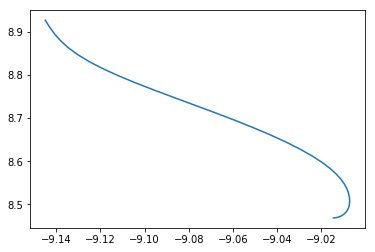

In [8]:
#Train model on Year, Month, Day

X2 = array[:,7:]
y2 = array[:,4:7]

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X2, y2, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

cvscores_3 = cross_val_score(reg, X2, y2, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X2, y2, cv = 10)
print(np.mean(cvscores_10))

alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize = True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X2, y2, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
plt.plot(ridge_scores, ridge_scores_std)

R^2: 0.1191342590822072
Root Mean Squared Error: 0.9101766848174073
[-0.29004436 -0.12664786  0.03372698  0.21848268  0.01128959]
Average 5-Fold CV Score: -0.030638594309609225
-0.1262630849260902
-0.0032951821440339924


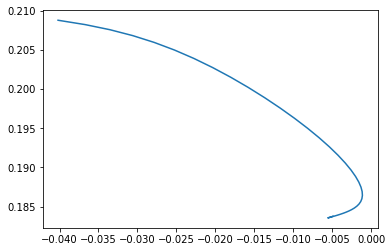

In [9]:
#Train Model on Depth_km

X3 = array[:,7:]
y3 = array[:,3]

X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X3, y3, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

cvscores_3 = cross_val_score(reg, X3, y3, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X3, y3, cv = 10)
print(np.mean(cvscores_10))

alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize = True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X3, y3, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
plt.plot(ridge_scores, ridge_scores_std)

R^2: -0.03740427402890045
Root Mean Squared Error: 28.34835609621498
[ -21.78903881   -2.70126564  -12.63476157  -53.13712506 -156.81311288]
Average 5-Fold CV Score: -49.415060791757114
-24.333217972306898
-138.77820921427485


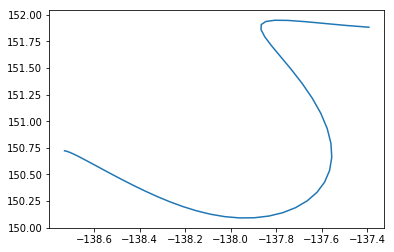

In [10]:
#Train Model on Mag

X4 = array[:,7:]
y4 = array[:,4]

X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X4, y4, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

cvscores_3 = cross_val_score(reg, X4, y4, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X4, y4, cv = 10)
print(np.mean(cvscores_10))

alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize = True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X4, y4, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
plt.plot(ridge_scores, ridge_scores_std)

Lat Lng is really the only thing that the model works for. But it works really well. I guess that makes sense since the things we were measuring were just based on location. To get better model for other parameters measure other things related to them.

In [11]:
OK_2015 = pd.read_csv("MR_Data/OK_2015.csv")

In [12]:
OK_2015.columns

Index(['id', 'origintime', 'latitude', 'longitude', 'depth', 'err_lon',
       'err_lat', 'err_depth', 'err_origintime', 'county', 'origin_src',
       'prefmag', 'pmag_type', 'pmag_src', 'mw', 'mw_src', 'mblg_ogs',
       'mblg_usgs', 'ml_ogs', 'm3hz_ogs', 'md_ogs', 'mb', 'ms', 'mfa',
       'max_mmi', 'reafile', 'reamtime', 'geom', 'pdlid', 'mw_ogs'],
      dtype='object')

In [13]:
OK_2015_lat_lng = OK_2015.drop(['id', 'origintime', 'depth', 'err_lon',
       'err_lat', 'err_depth', 'err_origintime', 'county', 'origin_src',
       'prefmag', 'pmag_type', 'pmag_src', 'mw', 'mw_src', 'mblg_ogs',
       'mblg_usgs', 'ml_ogs', 'm3hz_ogs', 'md_ogs', 'mb', 'ms', 'mfa',
       'max_mmi', 'reafile', 'reamtime', 'geom', 'pdlid', 'mw_ogs'], axis = 1)

OK_2015_lat_lng.columns

Index(['latitude', 'longitude'], dtype='object')

In [14]:
geometry = [Point(xy) for xy in zip(OK_2015_lat_lng.longitude, OK_2015_lat_lng.latitude)]
crs = {"init": "epsg:4326"} 
OK_2015_gdf = gpd.GeoDataFrame(OK_2015_lat_lng, crs=crs, geometry=geometry)

boundaries_gdf = gpd.read_file("MR_Data/PB2002_steps.json")

earthquakes_geo = OK_2015_gdf.geometry

boundaries_geo = boundaries_gdf.geometry
sub_geo = boundaries_gdf[boundaries_gdf["STEPCLASS"].str.contains("SUB")].geometry
ccb_geo = boundaries_gdf[boundaries_gdf["STEPCLASS"].str.contains("CCB")].geometry
crb_geo = boundaries_gdf[boundaries_gdf["STEPCLASS"].str.contains("CRB")].geometry
ctf_geo = boundaries_gdf[boundaries_gdf["STEPCLASS"].str.contains("CTF")].geometry
ocb_geo = boundaries_gdf[boundaries_gdf["STEPCLASS"].str.contains("OCB")].geometry
osr_geo = boundaries_gdf[boundaries_gdf["STEPCLASS"].str.contains("OSR")].geometry
otf_geo = boundaries_gdf[boundaries_gdf["STEPCLASS"].str.contains("OTF")].geometry

def quake_dist(geoseries):
    dist_list = []
    for quake in earthquakes_geo:
        dist = np.min([quake.distance(vol) for vol in geoseries])
        dist_list.append(dist)
    return dist_list

boundary_list = [boundaries_geo, sub_geo, ccb_geo, crb_geo, ctf_geo, ocb_geo, osr_geo, otf_geo]

total_bound_dist = []

for geoseries in boundary_list:
    min_distances = quake_dist(geoseries)
    total_bound_dist.append(min_distances)
    
total_bound_dist

boundary_distances = pd.DataFrame(total_bound_dist)
boundary_distances = boundary_distances.transpose()
boundary_distances.columns = ["boundaries_geo", "sub_geo", "ccb_geo", "crb_geo", "ctf_geo", "ocb_geo", 
                              "osr_geo", "otf_geo"]
earthquakes_dist = pd.concat([OK_2015_gdf, boundary_distances], axis=1)

earthquakes_dist.to_file(filename = "MR_Data/OK_2015_bound_dist.GeoJSON", driver = "GeoJSON")

volcanoes = pd.read_csv("MR_Data/volcanoes_scraped.csv")
volcanoes = volcanoes.drop(["Unnamed: 0", "geometry"], axis = 1)

geometry = [Point(xy) for xy in zip(volcanoes.lng, volcanoes.lat)]
crs = {"init": "epsg:4326"} 
volcanoes_gdf = gpd.GeoDataFrame(volcanoes, crs=crs, geometry=geometry)

volcanoes_gdf = volcanoes_gdf.drop([86, 96, 263, 276])
volcanoes_gdf = volcanoes_gdf.drop(volcanoes_gdf[volcanoes_gdf["Type"].isnull()].index)

vol_geo = volcanoes_gdf.geometry
strato_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Stratovolcano")].geometry
caldera_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Caldera")].geometry
shield_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Shield")].geometry
complex_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Complex Volcano")].geometry
submarine_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Submarine")].geometry
vol_field_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Volcanic Field")].geometry
cinder_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Cinder Cone")].geometry
dome_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Dome")].geometry
fissure_vents_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Fissure vents")].geometry
somma_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Somma Volcano")].geometry
maar_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Maar")].geometry
proclastic_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Pyroclastic Cone")].geometry
flood_basalt_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Flood Basalt")].geometry
tuff_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Tuff Ring")].geometry
plug_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Plug")].geometry
noname_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("")].geometry

vol_type_list = [vol_geo, strato_vol, caldera_vol, shield_vol, complex_vol, submarine_vol, vol_field_vol, 
                 cinder_vol, dome_vol, fissure_vents_vol, somma_vol, maar_vol, proclastic_vol, tuff_vol, 
                 plug_vol]

total_vol_dist = []

for geoseries in vol_type_list:
    dist_list = quake_dist(geoseries)
    total_vol_dist.append(dist_list)
    
total_vol_dist

vol_dist = pd.DataFrame(total_vol_dist)
vol_dist = vol_dist.transpose()
vol_dist.columns = ["vol", "strato", "caldera", "shield", "complex", "submarine", "vol_field", "cinder", 
                 "dome", "fissure_vents", "somma", "maar", "proclastic", "tuff", 
                 "plug"]
quake_vol_dist = pd.concat([OK_2015_gdf, vol_dist], axis=1)

quake_vol_dist.to_file(filename = "MR_Data/OK_2015_vol_dist.GeoJSON", driver = "GeoJSON")

In [15]:
OK_2015_bound = gpd.read_file("MR_Data/OK_2015_bound_dist.GeoJSON")
OK_2015_bound = OK_2015_bound.drop("geometry", axis=1)
OK_2015_bound.head()

,latitude,longitude,boundaries_geo,sub_geo,ccb_geo,crb_geo,ctf_geo,ocb_geo,osr_geo,otf_geo
0,36.36558,-97.07604,16.699619,17.564141,19.721321,17.763003,17.329627,17.564141,16.699619,16.699619
1,36.65549,-97.63704,16.469975,17.502359,19.201649,17.312037,16.981989,17.502359,16.469975,16.469975
2,36.67116,-97.61475,16.497004,17.527447,19.225869,17.338056,17.009134,17.527447,16.497004,16.497004
3,36.88717,-97.68763,16.589986,17.673044,19.184520,17.336404,17.056117,17.673044,16.589986,16.589986
4,36.93193,-97.49207,16.763708,17.813665,19.384562,17.536036,17.247005,17.813665,16.763708,16.763708


In [16]:
OK_2015_vol = gpd.read_file("MR_Data/OK_2015_vol_dist.GeoJSON")
OK_2015_vol = OK_2015_vol.drop("geometry", axis=1)
OK_2015_vol.head()

,latitude,longitude,vol,strato,caldera,shield,complex,submarine,vol_field,cinder,dome,fissure_vents,somma,maar,proclastic,tuff,plug
0,36.36558,-97.07604,7.014464,17.256596,15.806030,25.247583,22.566722,34.290644,9.313559,7.014464,60.864697,82.652354,111.594977,20.384464,101.161535,16.592949,11.221870
1,36.65549,-97.63704,6.456227,17.504247,15.175672,24.627936,22.997642,33.671191,8.869837,6.456227,60.235773,83.087588,112.144392,19.816310,101.719913,15.961588,10.630173
2,36.67116,-97.61475,6.479022,17.521182,15.186807,24.644804,23.006450,33.688296,8.896078,6.479022,60.250517,83.061418,112.121536,19.838314,101.697507,15.974692,10.633306
3,36.88717,-97.68763,6.417274,17.732763,15.014532,24.513893,23.234220,33.559263,8.902446,6.417274,60.101906,83.060556,112.186586,19.762813,101.769025,15.815030,10.424059
4,36.93193,-97.49207,6.615504,17.789006,15.161756,24.689419,23.223368,33.735606,9.101112,6.615504,60.266654,82.861001,111.989584,19.958121,101.573243,15.972719,10.523948


In [17]:
ML_df_OK = pd.merge(left = OK_2015_bound, right = OK_2015_vol, how = "inner")

In [18]:
ML_df_OK.head()

,latitude,longitude,boundaries_geo,sub_geo,ccb_geo,crb_geo,ctf_geo,ocb_geo,osr_geo,otf_geo,...,submarine,vol_field,cinder,dome,fissure_vents,somma,maar,proclastic,tuff,plug
0,36.36558,-97.07604,16.699619,17.564141,19.721321,17.763003,17.329627,17.564141,16.699619,16.699619,...,34.290644,9.313559,7.014464,60.864697,82.652354,111.594977,20.384464,101.161535,16.592949,11.221870
1,36.65549,-97.63704,16.469975,17.502359,19.201649,17.312037,16.981989,17.502359,16.469975,16.469975,...,33.671191,8.869837,6.456227,60.235773,83.087588,112.144392,19.816310,101.719913,15.961588,10.630173
2,36.67116,-97.61475,16.497004,17.527447,19.225869,17.338056,17.009134,17.527447,16.497004,16.497004,...,33.688296,8.896078,6.479022,60.250517,83.061418,112.121536,19.838314,101.697507,15.974692,10.633306
3,36.88717,-97.68763,16.589986,17.673044,19.184520,17.336404,17.056117,17.673044,16.589986,16.589986,...,33.559263,8.902446,6.417274,60.101906,83.060556,112.186586,19.762813,101.769025,15.815030,10.424059
4,36.93193,-97.49207,16.763708,17.813665,19.384562,17.536036,17.247005,17.813665,16.763708,16.763708,...,33.735606,9.101112,6.615504,60.266654,82.861001,111.989584,19.958121,101.573243,15.972719,10.523948


In [19]:
ML_df_OK[ML_df_OK.isnull().any(axis=1)]

,latitude,longitude,boundaries_geo,sub_geo,ccb_geo,crb_geo,ctf_geo,ocb_geo,osr_geo,otf_geo,...,submarine,vol_field,cinder,dome,fissure_vents,somma,maar,proclastic,tuff,plug


In [20]:
print(np.any(np.isnan(ML_df_OK)))
print(np.all(np.isfinite(ML_df_OK)))
print(np.any(np.isnan(ML_df)))
print(np.all(np.isfinite(ML_df)))

False
True
True
False


In [21]:
ML_df[ML_df.isnull().any(axis=1)]

,lat,lng,Depth_km,Mag,Year,Month,Day,SUB,CCB,CRB,...,Cinder Cone,Dome,Fissure vents,Somma Volcano,Maar,Pyroclastic Cone,Tuff Ring,Plug,None,vol
1,40.299999,43.099998,NaN,5.9,1900,7,12,10.216418,2.239036,7.533580,...,113.334461,16.367605,30.143661,28.674714,32.597928,39.126138,155.097269,147.862533,1.341641,1.341641
4,43.400002,28.700001,NaN,6.4,1901,3,31,8.001042,9.939516,2.871916,...,119.462763,6.908440,20.231027,14.501356,36.643486,25.335842,140.660320,133.405395,6.908440,6.908440
9,40.700001,33.599998,NaN,5.5,1902,3,9,5.983079,4.591222,2.827732,...,122.765793,7.613968,22.045643,19.170374,32.993712,29.701662,145.590909,138.354974,2.320196,2.320196
15,32.200001,35.299999,NaN,5.7,1903,3,29,2.613777,0.259454,3.981720,...,122.057248,9.304111,20.162301,22.580107,24.341837,31.653384,147.708352,140.548066,6.417576,6.417576
16,39.139999,42.650002,NaN,7.0,1903,4,28,9.240592,0.994812,6.637015,...,113.892978,15.705447,29.272591,28.269964,31.385953,38.608334,154.677231,147.451123,1.742439,1.742439
17,40.900002,42.700001,NaN,5.8,1903,5,28,10.229040,2.647430,7.500112,...,113.680321,16.124719,30.031725,28.270114,33.136764,38.776473,154.685344,147.446429,1.999999,1.999999
19,35.200001,58.200001,NaN,6.5,1903,9,25,23.703634,8.009360,11.208868,...,98.967648,31.094768,43.223888,44.129325,33.632501,42.402008,170.372168,163.170982,6.136009,6.136009
20,23.500000,120.500000,NaN,6.0,1904,4,24,1.868617,0.066491,1.604402,...,44.607437,14.666735,105.016458,39.572299,83.590222,21.815597,233.336005,226.186314,3.385411,3.385411
23,23.500000,120.300003,NaN,6.3,1904,11,5,1.874174,0.128080,1.744734,...,44.766631,14.816378,104.816645,39.732942,83.393679,21.986363,233.136759,225.987190,3.479224,3.479224
36,18.200001,-76.699997,NaN,6.5,1907,1,14,5.970569,6.334705,7.772114,...,11.505482,84.308746,63.498091,93.895371,44.886021,83.035030,43.514569,38.483242,10.986401,10.986401


In [22]:
ML_df_latlng = ML_df.drop(["Depth_km", "Mag", "Year", "Month", "Day", "None"], axis=1)
ML_df_latlng.columns

Index(['lat', 'lng', 'SUB', 'CCB', 'CRB', 'CTF', 'OCB', 'OSR', 'OTF', 'plates',
       'Stratovolcano', 'Caldera', 'Shield', 'Complex Volcano', 'Submarine',
       'Volcanic Field', 'Cinder Cone', 'Dome', 'Fissure vents',
       'Somma Volcano', 'Maar', 'Pyroclastic Cone', 'Tuff Ring', 'Plug',
       'vol'],
      dtype='object')

In [23]:
print(np.any(np.isnan(ML_df_OK)))
print(np.all(np.isfinite(ML_df_OK)))
print(np.any(np.isnan(ML_df_latlng)))
print(np.all(np.isfinite(ML_df_latlng)))

False
True
False
True


In [24]:
print(ML_df_latlng.shape)
print(ML_df_OK.shape)

(1340, 25)
(7726, 25)


In [25]:
array_train = ML_df_latlng.values
array_test = ML_df_OK.values

X = array_train[:,2:]
y = array_train[:,:2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(array_test[:,2:])

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(array_test[:,2:], array_test[:,:2])))
rmse = np.sqrt(mean_squared_error(array_test[:,:2], y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: -118342.58743065497
Root Mean Squared Error: 167.3883351140551


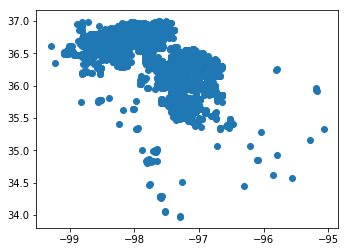

In [26]:
OK_2015_gdf.plot()

In [27]:
USA_gdf = gpd.read_file("MR_Data/countries/USA.geo.json")

In [28]:
USA_gdf

,id,name,geometry
0,USA,United States of America,"(POLYGON ((-155.54211 19.08348, -155.68817 18...."


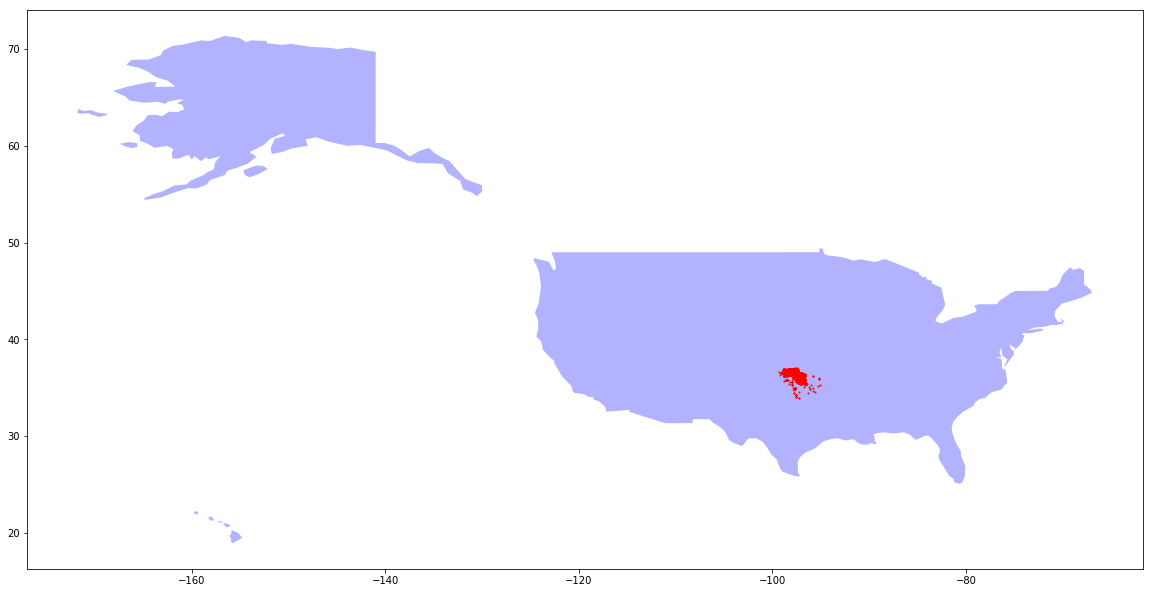

In [29]:
fig, ax = plt.subplots(figsize = (20, 20))
ax.set_aspect('equal')

USA_gdf.plot(ax=ax, color='blue', alpha = 0.3)
OK_2015_gdf.plot(ax=ax, color = "red", markersize = 1)

In [30]:
from geopandas.tools import sjoin
pointInPolys = sjoin(OK_2015_gdf, USA_gdf, how='inner')

In [31]:
pointInPolys

,latitude,longitude,geometry,index_right,id,name
0,36.36558,-97.07604,POINT (-97.07604000000001 36.36558),0,USA,United States of America
1,36.65549,-97.63704,POINT (-97.63704 36.65549),0,USA,United States of America
2,36.67116,-97.61475,POINT (-97.61475 36.67116),0,USA,United States of America
3,36.88717,-97.68763,POINT (-97.68763 36.88717),0,USA,United States of America
4,36.93193,-97.49207,POINT (-97.49207 36.93193),0,USA,United States of America
5,36.35779,-97.35674,POINT (-97.35674 36.35779),0,USA,United States of America
6,36.92887,-97.49327,POINT (-97.49327 36.92887),0,USA,United States of America
7,36.81870,-97.71685,POINT (-97.71684999999999 36.8187),0,USA,United States of America
8,36.41879,-97.28671,POINT (-97.28671 36.41879),0,USA,United States of America
9,36.42391,-97.28201,POINT (-97.28201 36.42391),0,USA,United States of America


In [32]:
earthquakes = gpd.read_file("earthquakes.GeoJSON")

In [33]:
earthquakes

,Country,lat,lng,Depth_km,Mag,Secondary_Effects,EM-DAT_Deaths,Other_Deaths,Year,Month,Day,Max_Deaths,Utsu_Deaths,PDE_Deaths,PDE_Shaking_Deaths,geometry
0,Japan,38.700001,141.100006,5.000000,7.0,,0.0,,1900,05,11,0.0,NaN,NaN,NaN,POINT (141.1000061035156 38.70000076293945)
1,Turkey,40.299999,43.099998,NaN,5.9,,0.0,,1900,07,12,140.0,140.0,NaN,NaN,POINT (43.09999847412109 40.29999923706055)
2,Venezuela,11.000000,-66.000000,0.000000,7.7,,0.0,,1900,10,29,0.0,NaN,NaN,NaN,POINT (-66 11)
3,China,26.000000,100.099998,0.000000,6.5,,0.0,,1901,02,15,0.0,NaN,NaN,NaN,POINT (100.0999984741211 26)
4,Bulgaria,43.400002,28.700001,NaN,6.4,,0.0,,1901,03,31,4.0,4.0,NaN,NaN,POINT (28.70000076293945 43.40000152587891)
5,Japan,40.500000,142.500000,35.000000,7.2,T,0.0,,1901,08,09,0.0,NaN,NaN,NaN,POINT (142.5 40.5)
6,New Zealand,-43.000000,173.000000,0.000000,6.8,,0.0,,1901,11,15,1.0,1.0,NaN,NaN,POINT (173 -43)
7,Japan,40.500000,141.300003,35.000000,6.9,,0.0,,1902,01,30,1.0,1.0,NaN,NaN,POINT (141.3000030517578 40.5)
8,Azerbaijan,40.700001,48.599998,15.000000,6.9,,0.0,,1902,02,13,86.0,86.0,NaN,NaN,POINT (48.59999847412109 40.70000076293945)
9,Turkey,40.700001,33.599998,NaN,5.5,,0.0,,1902,03,09,4.0,4.0,NaN,NaN,POINT (33.59999847412109 40.70000076293945)


In [34]:
USA_quakes = sjoin(earthquakes, USA_gdf, how='inner')
USA_quakes

,Country,lat,lng,Depth_km,Mag,Secondary_Effects,EM-DAT_Deaths,Other_Deaths,Year,Month,Day,Max_Deaths,Utsu_Deaths,PDE_Deaths,PDE_Shaking_Deaths,geometry,index_right,id,name
81,United States,32.799999,-115.500000,NaN,6.2,,0.0,,1915,06,23,6.0,6.0,NaN,NaN,POINT (-115.5 32.79999923706055),0,USA,United States of America
93,United States,33.812000,-117.440002,15.000000,6.8,,0.0,,1918,04,21,1.0,1.0,NaN,NaN,POINT (-117.4400024414062 33.8120002746582),0,USA,United States of America
129,United States,34.500000,-119.599998,NaN,6.2,,0.0,,1925,06,29,13.0,13.0,NaN,NaN,POINT (-119.5999984741211 34.5),0,USA,United States of America
233,United States,33.222000,-115.696999,15.000000,6.9,,0.0,,1940,05,19,9.0,9.0,NaN,NaN,POINT (-115.6969985961914 33.22200012207031),0,USA,United States of America
328,United States,34.949001,-119.045998,10.000000,7.3,,0.0,,1952,07,21,12.0,12.0,NaN,NaN,POINT (-119.0459976196289 34.94900131225586),0,USA,United States of America
330,United States,35.333000,-118.917000,16.000000,5.8,,0.0,,1952,08,22,2.0,2.0,NaN,NaN,POINT (-118.9169998168945 35.33300018310547),0,USA,United States of America
378,US Territory of Alaska,58.369999,-136.664993,35.000000,7.3,T,0.0,,1958,07,10,5.0,5.0,NaN,NaN,POINT (-136.6649932861328 58.36999893188477),0,USA,United States of America
387,United States,44.548000,-110.636002,15.000000,7.3,,0.0,,1959,08,18,28.0,28.0,NaN,NaN,POINT (-110.6360015869141 44.54800033569336),0,USA,United States of America
416,United States,61.016998,-147.647995,6.600000,9.2,T,0.0,,1964,03,28,131.0,131.0,NaN,NaN,POINT (-147.6479949951172 61.01699829101562),0,USA,United States of America
429,United States,47.317001,-122.334999,65.400002,6.5,,0.0,,1965,04,29,7.0,7.0,NaN,NaN,POINT (-122.3349990844727 47.31700134277344),0,USA,United States of America


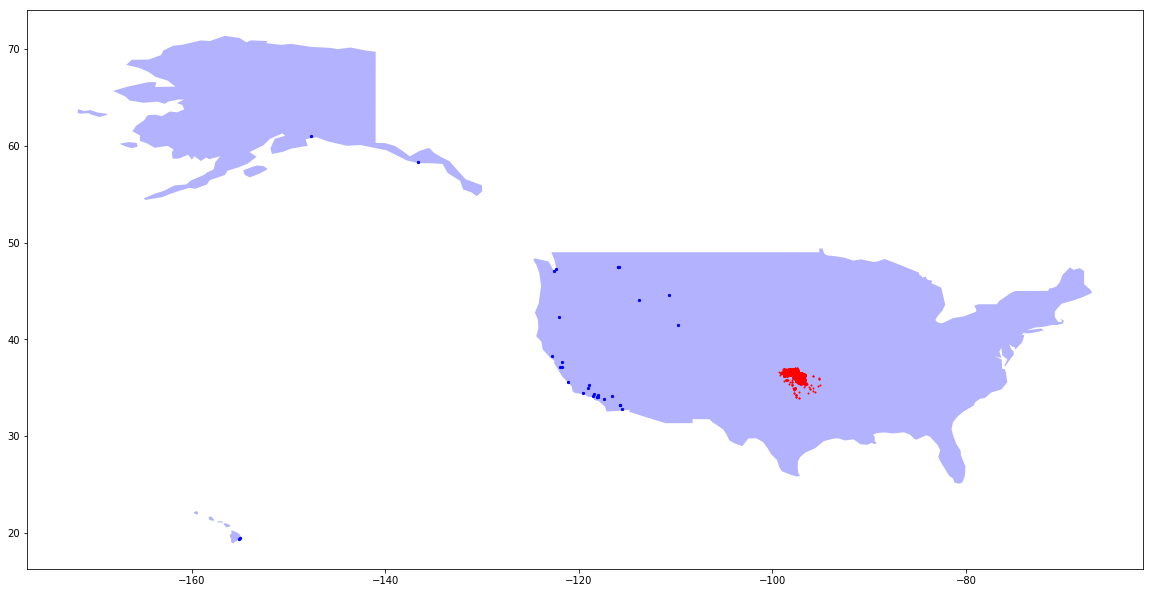

In [35]:
fig, ax = plt.subplots(figsize = (20, 20))
ax.set_aspect('equal')

USA_gdf.plot(ax=ax, color='blue', alpha = 0.3)
OK_2015_gdf.plot(ax=ax, color = "red", markersize = 1)
USA_quakes.plot(ax=ax, color = "blue", markersize = 5)

In [36]:
boundary_distances2 = pd.read_csv("MR_Data/Earthquake_boundary_distances2")
boundary_distances2 = boundary_distances2.drop("Unnamed: 0", axis = 1)

In [37]:
boundary_distances2.columns

Index(['date', 'depth', 'mag', 'id', 'place', 'geometry', 'date.1', 'depth.1',
       'mag.1', 'id.1', 'place.1', 'geometry.1', 'boundaries_geo2', 'sub_geo2',
       'ccb_geo2', 'crb_geo2', 'ctf_geo2', 'ocb_geo2', 'osr_geo2', 'otf_geo2',
       'closest_boundary2'],
      dtype='object')

In [38]:
boundary_distances2 = boundary_distances2.drop(["date.1", "depth.1", "mag.1", "id.1", "place.1", "geometry.1", "date", "depth", "mag", "id", "place"], axis = 1)

In [39]:
type(boundary_distances2)

pandas.core.frame.DataFrame

In [40]:
earthquakes2 = gpd.read_file("MR_Data/earthquakes2.geojson")

In [41]:
boundary_distances2_gdf = gpd.GeoDataFrame(boundary_distances2, crs = crs, geometry = earthquakes2["geometry"])

In [42]:
boundary_distances2_gdf

,geometry,boundaries_geo2,sub_geo2,ccb_geo2,crb_geo2,ctf_geo2,ocb_geo2,osr_geo2,otf_geo2,closest_boundary2
0,POINT (-1.89 -55.877),0.221410,22.051172,32.701335,30.812117,26.219884,27.611902,0.355460,0.221410,OTF
1,POINT (84.542 43.7),14.366975,30.915059,14.366975,18.764151,14.530203,27.458720,32.675968,27.458720,CCB
2,POINT (42.609 11.374),0.346336,24.585383,18.971821,0.346336,1.259295,14.433952,1.221475,2.743895,CRB
3,POINT (94.547 6.352),0.259956,2.108272,8.276883,1.254022,0.259956,4.269910,0.487571,0.855725,CTF
4,POINT (94.756 6.418),0.054731,2.327099,8.166058,1.221409,0.054731,4.319760,0.492587,0.732100,CTF
5,POINT (-27.278 -55.591),0.411938,0.411938,7.314302,7.007927,4.894661,2.280326,2.280326,1.489146,SUB
6,POINT (-27.475 -55.585),0.449286,0.449286,7.117457,6.870418,4.887415,2.088277,2.088277,1.307664,SUB
7,POINT (-27.115 -55.57),0.355971,0.355971,7.477691,7.141388,4.932414,2.433977,2.433977,1.632865,SUB
8,POINT (95.83199999999999 16.046),0.457863,4.427331,0.874442,2.031042,0.457863,3.708297,3.145046,6.147865,CTF
9,POINT (122.323 23.401),0.300413,2.574879,1.807350,1.467501,1.012547,0.300413,2.473092,0.300413,OCB


In [43]:
quake_vol_dist_smith_gdf = gpd.read_file("quake_vol_dist_smith.GeoJSON")

In [44]:
quake_vol_dist_smith_gdf = quake_vol_dist_smith_gdf.drop(["date", "depth", "mag", "id", "place"], axis = 1)
#quake_vol_dist_smith

In [45]:
type(quake_vol_dist_smith_gdf)

geopandas.geodataframe.GeoDataFrame

In [46]:
lat = []
lng = []
for point in quake_vol_dist_smith_gdf.geometry:
    lng.append(point.x)
    lat.append(point.y)
quake_vol_dist_smith_gdf["lat"] = lat
quake_vol_dist_smith_gdf["lng"] = lng

In [47]:
lat = []
lng = []
for point in boundary_distances2_gdf.geometry:
    lng.append(point.x)
    lat.append(point.y)
boundary_distances2_gdf["lat"] = lat
boundary_distances2_gdf["lng"] = lng

In [48]:
print(quake_vol_dist_smith_gdf.head())
print(boundary_distances2_gdf.head())

         vol     strato    caldera     shield    complex  submarine  \
0  21.468662  24.633615  71.653217  21.468662  69.757167  90.654100   
1  29.134168  29.134168  43.531613  47.948883  40.541596  64.813244   
2   2.197675   2.197675   3.891791   2.534868  10.883218  73.338572   
3   2.293132   8.167342   5.707195  46.532083   2.293132  52.406506   
4   2.179803   8.035020   5.597117  46.325793   2.179803  52.187461   

   vol_field      cinder       dome  fissure_vents      somma       maar  \
0  64.227574  108.947317  96.841323      85.105870  98.064531  75.537533   
1  41.879953   71.755708  48.031874      70.726568  67.794319  58.349150   
2  17.094000  113.938904  29.650929      31.733117  40.756876   5.402597   
3  52.838450   61.918000  45.666978      81.880541  70.651723  56.222647   
4  52.660799   61.726635  45.459315      82.064741  70.442976  56.429604   

   proclastic        tuff        plug               geometry     lat     lng  
0   93.487813  148.428379  143.755082

In [49]:
quake_vol_dist_smith_gdf = quake_vol_dist_smith_gdf.drop("geometry", axis = 1)
boundary_distances2_gdf = boundary_distances2_gdf.drop(["geometry", "closest_boundary2"], axis = 1)

In [50]:
print(quake_vol_dist_smith_gdf.shape)
print(boundary_distances2_gdf.shape)

(24638, 17)
(24638, 10)


In [51]:
ML_df_smith = pd.merge(left = quake_vol_dist_smith_gdf, right = boundary_distances2_gdf, how = "inner")

In [52]:
ML_df_smith.shape

(24658, 25)

In [53]:
ML_df_smith.columns = ['lat', 'lng', 'vol', 'strato', 'caldera', 'shield', 'complex', 'submarine',
       'vol_field', 'cinder', 'dome', 'fissure_vents', 'somma', 'maar',
       'proclastic', 'tuff', 'plug', 'boundaries_geo2',
       'sub_geo2', 'ccb_geo2', 'crb_geo2', 'ctf_geo2', 'ocb_geo2', 'osr_geo2',
       'otf_geo2']

In [54]:
ML_df_smith.columns

Index(['lat', 'lng', 'vol', 'strato', 'caldera', 'shield', 'complex',
       'submarine', 'vol_field', 'cinder', 'dome', 'fissure_vents', 'somma',
       'maar', 'proclastic', 'tuff', 'plug', 'boundaries_geo2', 'sub_geo2',
       'ccb_geo2', 'crb_geo2', 'ctf_geo2', 'ocb_geo2', 'osr_geo2', 'otf_geo2'],
      dtype='object')

R^2: 0.7581286847950345
Root Mean Squared Error: 3.6190365938575444
[0.73123835 0.75582815 0.74450547 0.778663   0.75146139]
Average 5-Fold CV Score: 0.7523392725709503
0.7530065904085707
0.7507967590175553


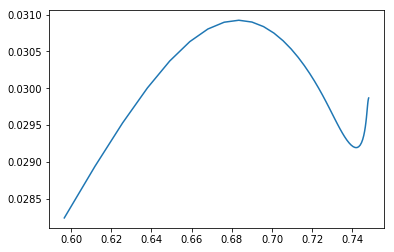

In [55]:
array = ML_df_smith.values

X = array[:,2:]
y = array[:,:2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

cvscores_3 = cross_val_score(reg, X, y, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X, y, cv = 10)
print(np.mean(cvscores_10))

alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize = True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
plt.plot(ridge_scores, ridge_scores_std)

In [56]:
print(np.any(np.isnan(ML_df_smith)))
print(np.all(np.isfinite(ML_df_smith)))

False
True


In [57]:
array_train = ML_df_smith.values
array_test = ML_df_OK.values

X = array_train[:,2:]
y = array_train[:,:2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(array_test[:,2:])

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(array_test[:,2:], array_test[:,:2])))
rmse = np.sqrt(mean_squared_error(array_test[:,:2], y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: -37818.42320242501
Root Mean Squared Error: 94.62595490864487


In [58]:
USA_quakes2 = sjoin(earthquakes2, USA_gdf, how='inner')

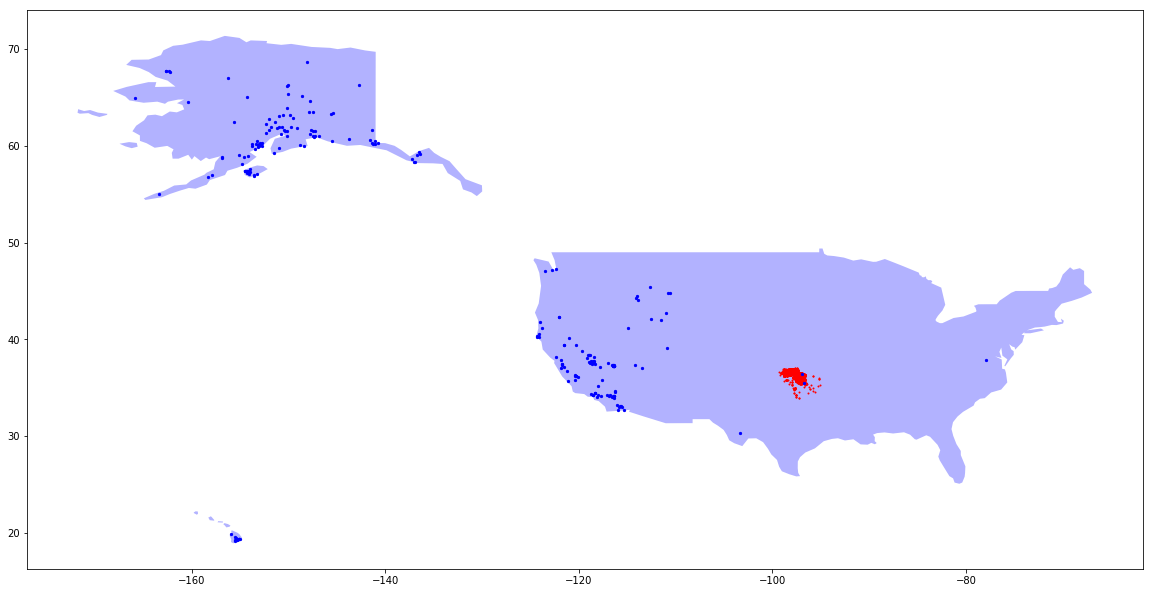

In [59]:
fig, ax = plt.subplots(figsize = (20, 20))
ax.set_aspect('equal')

USA_gdf.plot(ax=ax, color='blue', alpha = 0.3)
OK_2015_gdf.plot(ax=ax, color = "red", markersize = 1)
USA_quakes2.plot(ax=ax, color = "blue", markersize = 5)